In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

In [2]:
data = pd.read_csv("./accidents.csv")
data

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
target_map = {1: 0, 2:1, 3:2, 4:3}
data["Severity"] = data["Severity"].map(target_map)

In [4]:
data.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

# Correlation

In [6]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['TMC', 'Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

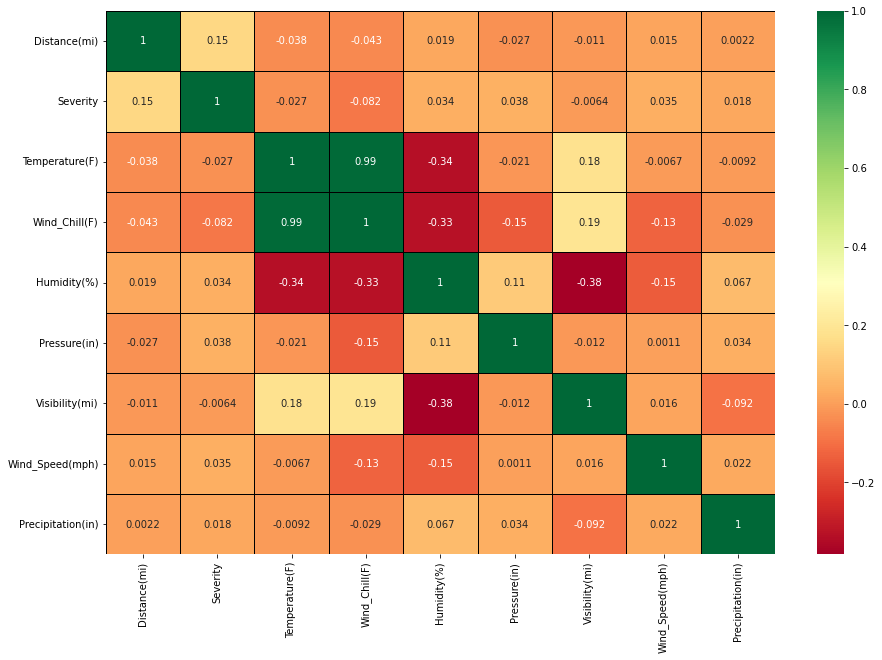

In [7]:
corr_columns = ["Distance(mi)", "Severity", "Temperature(F)", "Wind_Chill(F)", 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

fig=sns.heatmap(data[corr_columns].corr(), annot=True, cmap='RdYlGn', annot_kws={'size':10}, linecolor='black', linewidths=1)
fig=plt.gcf()
fig.set_size_inches(15, 10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

1. Wind_Chill(F) and Temperature(F) are highly correlated 
2. Temperature(F) and Humidity(%) are moderately correlated

In [8]:
def bar_plot(data, X, Y, mode="count"):
    """
    Count of Y for every X
    """
    group = data.groupby(X)[Y]
    group = group.mean() if mode == "mean" else group.count()
    group = group.reset_index()
    
    x_axis = group[X]
    x_axis = ["\n".join(str(x).split(" ")) for x in x_axis]
    y_axis = group[Y]

    plt.figure(figsize=(30, 15))
    plt.xticks(fontsize=10, rotation=90)
    
    sns.barplot(x=x_axis, y=y_axis)
    plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.3)
    plt.title(f'{Y} for every {X}')


def stacked_bar_plot(data, X, Y):
    """
    # stacked bar plot
    # count of all possible values of Y for all possible X
    # Example - Count of each Severity (Y) for each Weather Condition (X)
    """
    # count of all possible values of Y for all possible X
    value_counts = data.groupby(X)[Y].value_counts().reset_index(name="count")
    
    # fill in 0 for missing values of X-Y pair
    x = value_counts[[X]].drop_duplicates()
    y = value_counts[[Y]].drop_duplicates()

    x["temp"] = 0
    y["temp"] = 0

    temp = pd.merge(x, y, on=["temp"])
    temp.drop(columns=["temp"], inplace=True)
    temp.sort_values(by=[X, Y], ascending=True, inplace=True)

    value_counts = temp.merge(value_counts, how="left")
    value_counts.fillna(0, inplace=True)
    del temp
    
    # get numerical count values for X-Y pairs as list
    x_axis = value_counts[X].unique()
    x_axis = ["\n".join(str(x).split(" ")) for x in x_axis]
    
    y_axis = [value_counts[value_counts[Y] == value]["count"].tolist() for value in value_counts[Y].unique()]

    # plot the stacked bar graph
    plt.figure(figsize=(30,15))
    plt.xticks(fontsize=10, rotation=0)

    for i, severity in enumerate(value_counts[Y].unique()):
        plt.bar(x_axis, y_axis[i], label=f'{Y} {severity}')

    plt.legend()

# Correlation of all columns with Severity column

In [9]:
# check for overfitting
data.corr()["Severity"]

TMC                  0.181005
Severity             1.000000
Start_Lat            0.047617
Start_Lng            0.083705
End_Lat              0.036787
End_Lng              0.263622
Distance(mi)         0.150326
Number               0.019658
Temperature(F)      -0.027275
Wind_Chill(F)       -0.082260
Humidity(%)          0.034319
Pressure(in)         0.038380
Visibility(mi)      -0.006433
Wind_Speed(mph)      0.034959
Precipitation(in)    0.017840
Amenity             -0.044494
Bump                -0.004671
Crossing            -0.138368
Give_Way            -0.007747
Junction             0.060086
No_Exit             -0.006705
Railway             -0.023492
Roundabout          -0.003956
Station             -0.048260
Stop                -0.053500
Traffic_Calming     -0.006073
Traffic_Signal      -0.191531
Turning_Loop              NaN
Name: Severity, dtype: float64

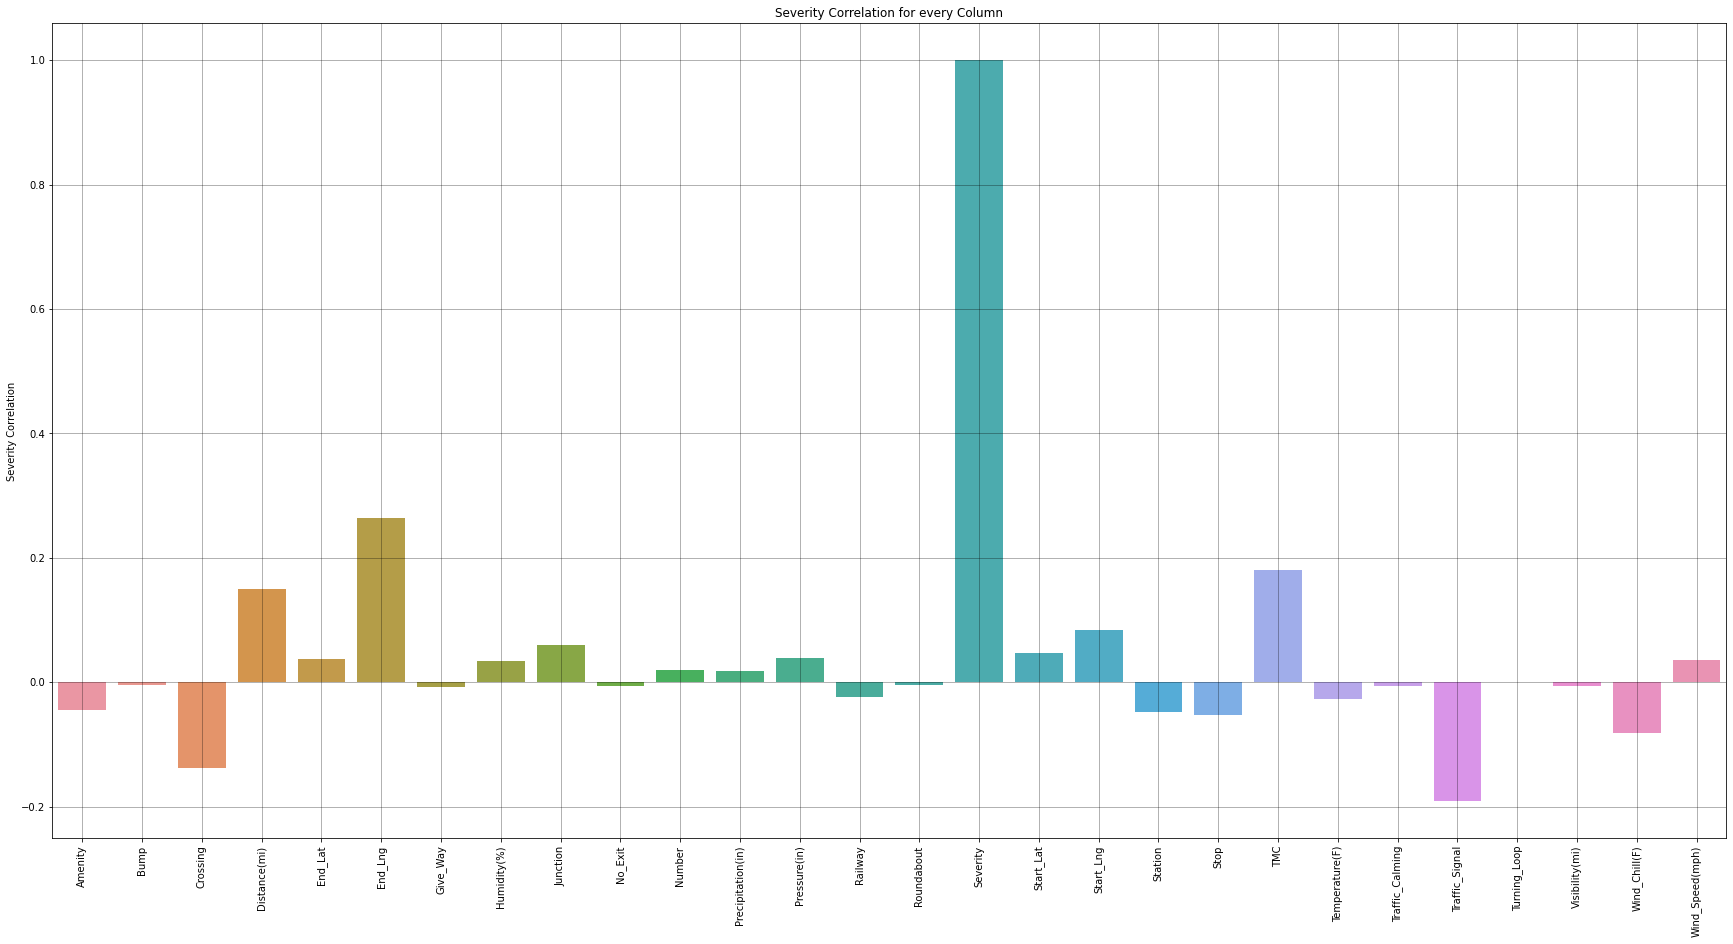

In [10]:
corr_data = data.corr()[["Severity"]].reset_index().rename(columns={"index": "Column", "Severity": "Severity Correlation"})
bar_plot(data=corr_data, X="Column", Y="Severity Correlation", mode="mean")

# NaN Handling

In [11]:
# percentage nans 
nan = lambda data: (data.isna().sum() / len(data) * 100).astype(int)
nan(data)

ID                        0
Source                    0
TMC                      29
Severity                  0
Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
End_Lat                  70
End_Lng                  70
Distance(mi)              0
Description               0
Number                   64
Street                    0
Side                      0
City                      0
County                    0
State                     0
Zipcode                   0
Country                   0
Timezone                  0
Airport_Code              0
Weather_Timestamp         1
Temperature(F)            1
Wind_Chill(F)            53
Humidity(%)               1
Pressure(in)              1
Visibility(mi)            2
Wind_Direction            1
Wind_Speed(mph)          12
Precipitation(in)        57
Weather_Condition         2
Amenity                   0
Bump                      0
Crossing                  0
Give_Way            

In [12]:
# Fill NaN Wind_Speed(mph)
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')
data['Month'] = data['Start_Time'].dt.month

nan_fill = data.groupby(["Zipcode", "Month"])["Wind_Speed(mph)"].mean().reset_index(name="Wind_Speed_NaN_Fill")
data = data.merge(nan_fill, how="left")

data["Wind_Speed(mph)"] = np.where(data["Wind_Speed(mph)"].isnull(), data["Wind_Speed_NaN_Fill"], data["Wind_Speed(mph)"])
data.drop(columns=["Wind_Speed_NaN_Fill", "Month"], inplace=True)

nan(data)

ID                        0
Source                    0
TMC                      29
Severity                  0
Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
End_Lat                  70
End_Lng                  70
Distance(mi)              0
Description               0
Number                   64
Street                    0
Side                      0
City                      0
County                    0
State                     0
Zipcode                   0
Country                   0
Timezone                  0
Airport_Code              0
Weather_Timestamp         1
Temperature(F)            1
Wind_Chill(F)            53
Humidity(%)               1
Pressure(in)              1
Visibility(mi)            2
Wind_Direction            1
Wind_Speed(mph)           3
Precipitation(in)        57
Weather_Condition         2
Amenity                   0
Bump                      0
Crossing                  0
Give_Way            

In [13]:
# remove majority NaN columns
majority_nan_columns = ["Wind_Chill(F)", "Precipitation(in)", "End_Lat", "End_Lng", "TMC", "Number", "Weather_Timestamp"]
data.drop(columns=majority_nan_columns, inplace=True)
nan(data)

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Temperature(F)           1
Humidity(%)              1
Pressure(in)             1
Visibility(mi)           2
Wind_Direction           1
Wind_Speed(mph)          3
Weather_Condition        2
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T

In [14]:
data.dropna(inplace=True)
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,2,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,MapQuest,1,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,2,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,1,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,MapQuest,2,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.010,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,1,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,Pomona Fwy E,...,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,1,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,...,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,1,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,...,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,1,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,...,False,False,False,False,False,False,Day,Day,Day,Day


In [15]:
# Check Label Balancing
data["Severity"].value_counts()

1    2233333
2     960979
3     102305
0      28482
Name: Severity, dtype: int64

# Boolean Columns Value Counts

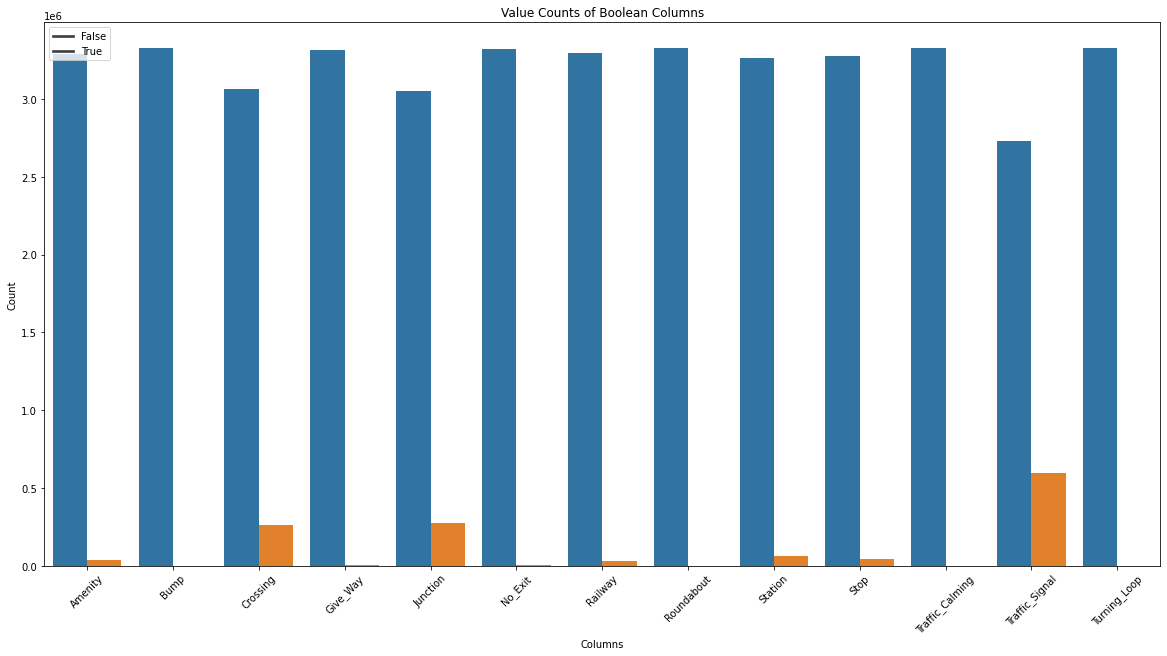

In [16]:
# Select boolean columns from the dataset
boolean_columns = data.select_dtypes(include='bool').columns

# Compute value counts for each boolean column
value_counts = data[boolean_columns].apply(pd.Series.value_counts)
value_counts = value_counts.reset_index().melt('index')

# Plotting
plt.figure(figsize=(20, 10))  # Set the figure size

# Create a bar plot using Seaborn
sns.barplot(data=value_counts, x='variable', y='value', hue='index')

plt.xlabel('Columns')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
plt.title('Value Counts of Boolean Columns')  # Set plot title
plt.legend(['False', 'True'])  # Show legend

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Number of Accidents (Percentage) Per State

In [17]:
n = 10
100 * data["State"].value_counts()[:n] / len(data)

CA    23.327757
TX     9.440411
FL     7.480559
SC     4.792128
NC     4.754926
NY     4.632584
PA     2.952423
IL     2.944273
MI     2.832728
GA     2.680161
Name: State, dtype: float64

In [18]:
data.groupby("State")["Severity"].value_counts().reset_index(name="Count")

,State,Severity,Count
0,AL,1,28561
1,AL,2,13569
2,AL,3,551
3,AL,0,132
4,AR,1,913
...,...,...,...
186,WV,3,418
187,WV,0,2
188,WY,3,180
189,WY,2,153


# Weather wise Severity Count

In [19]:
# weather wise accident count
data.Weather_Condition.value_counts()

Clear                      761780
Fair                       538444
Mostly Cloudy              477499
Overcast                   366551
Partly Cloudy              336984
                            ...  
Snow and Thunder                1
Partial Fog / Windy             1
Heavy Smoke                     1
Widespread Dust / Windy         1
Freezing Drizzle                1
Name: Weather_Condition, Length: 126, dtype: int64

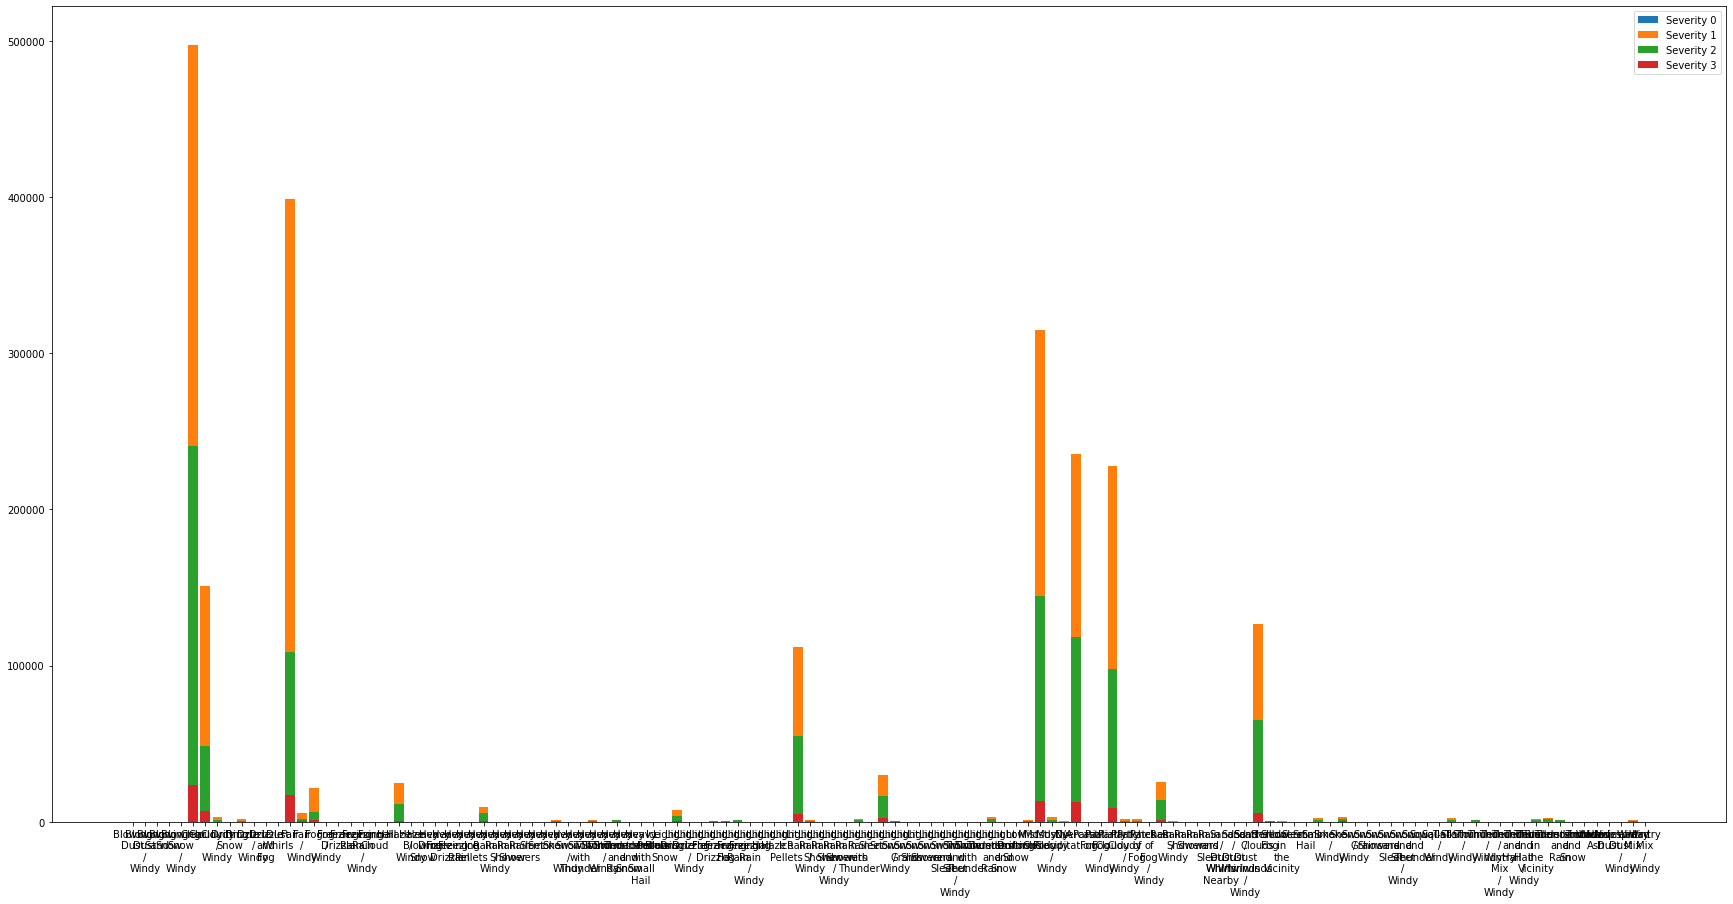

In [20]:
stacked_bar_plot(data, X="Weather_Condition", Y="Severity")

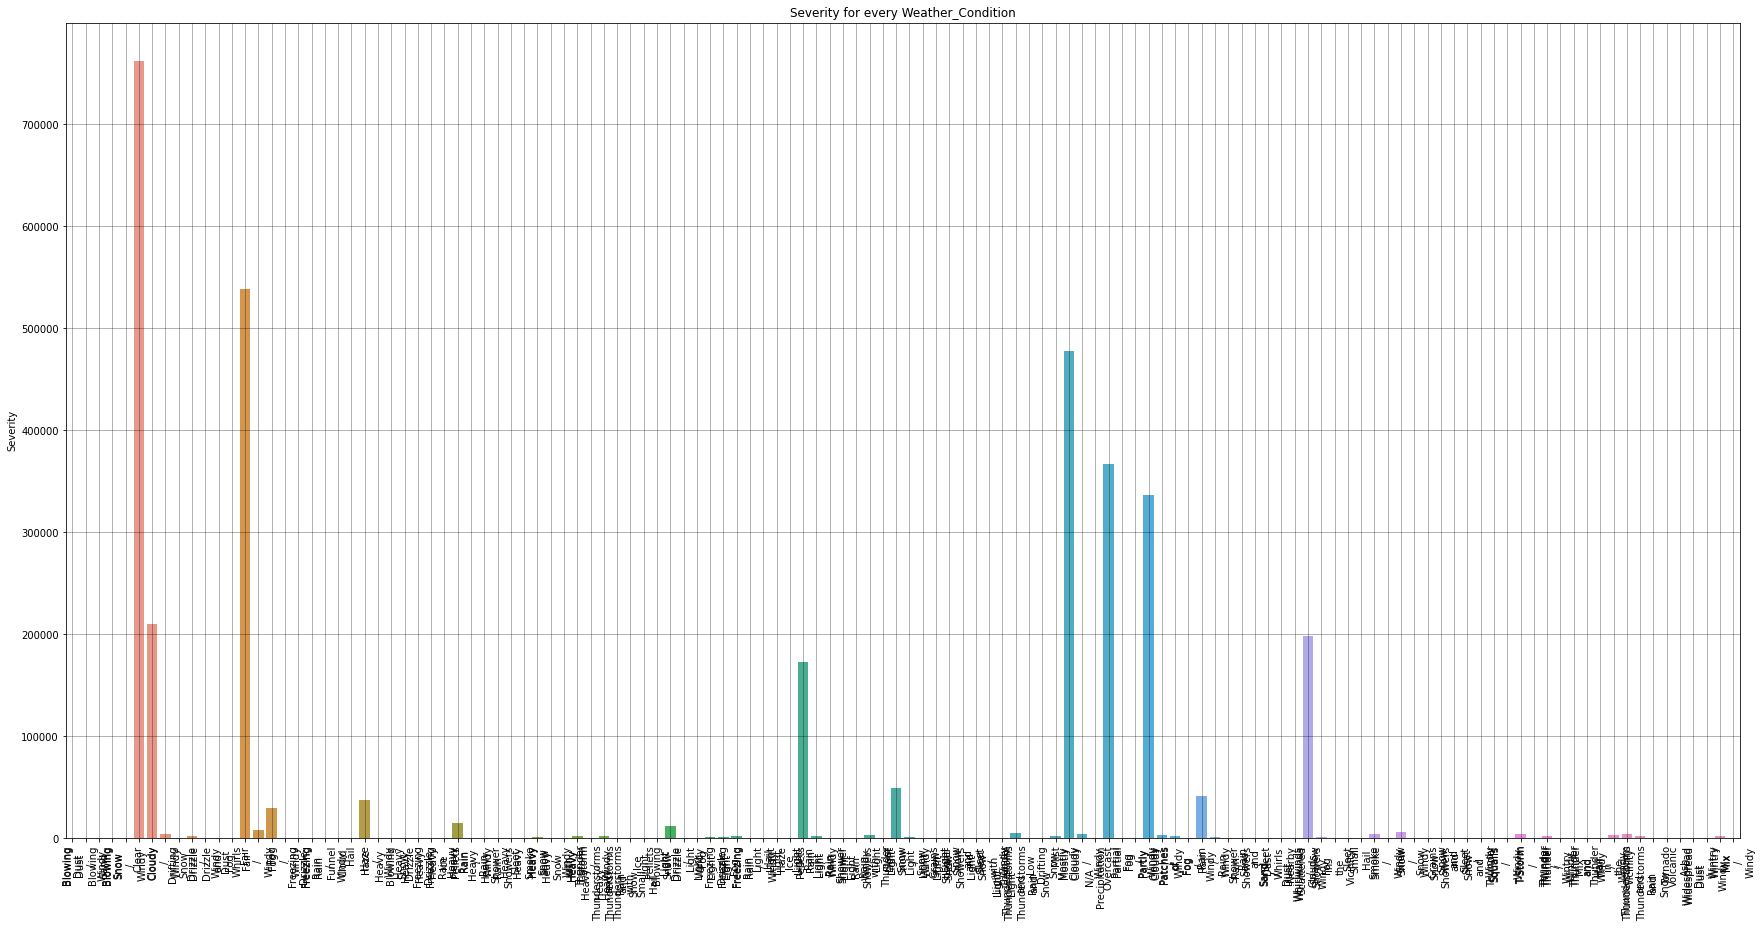

In [21]:
bar_plot(data, X="Weather_Condition", Y="Severity")

# State wise Severity Count + Count

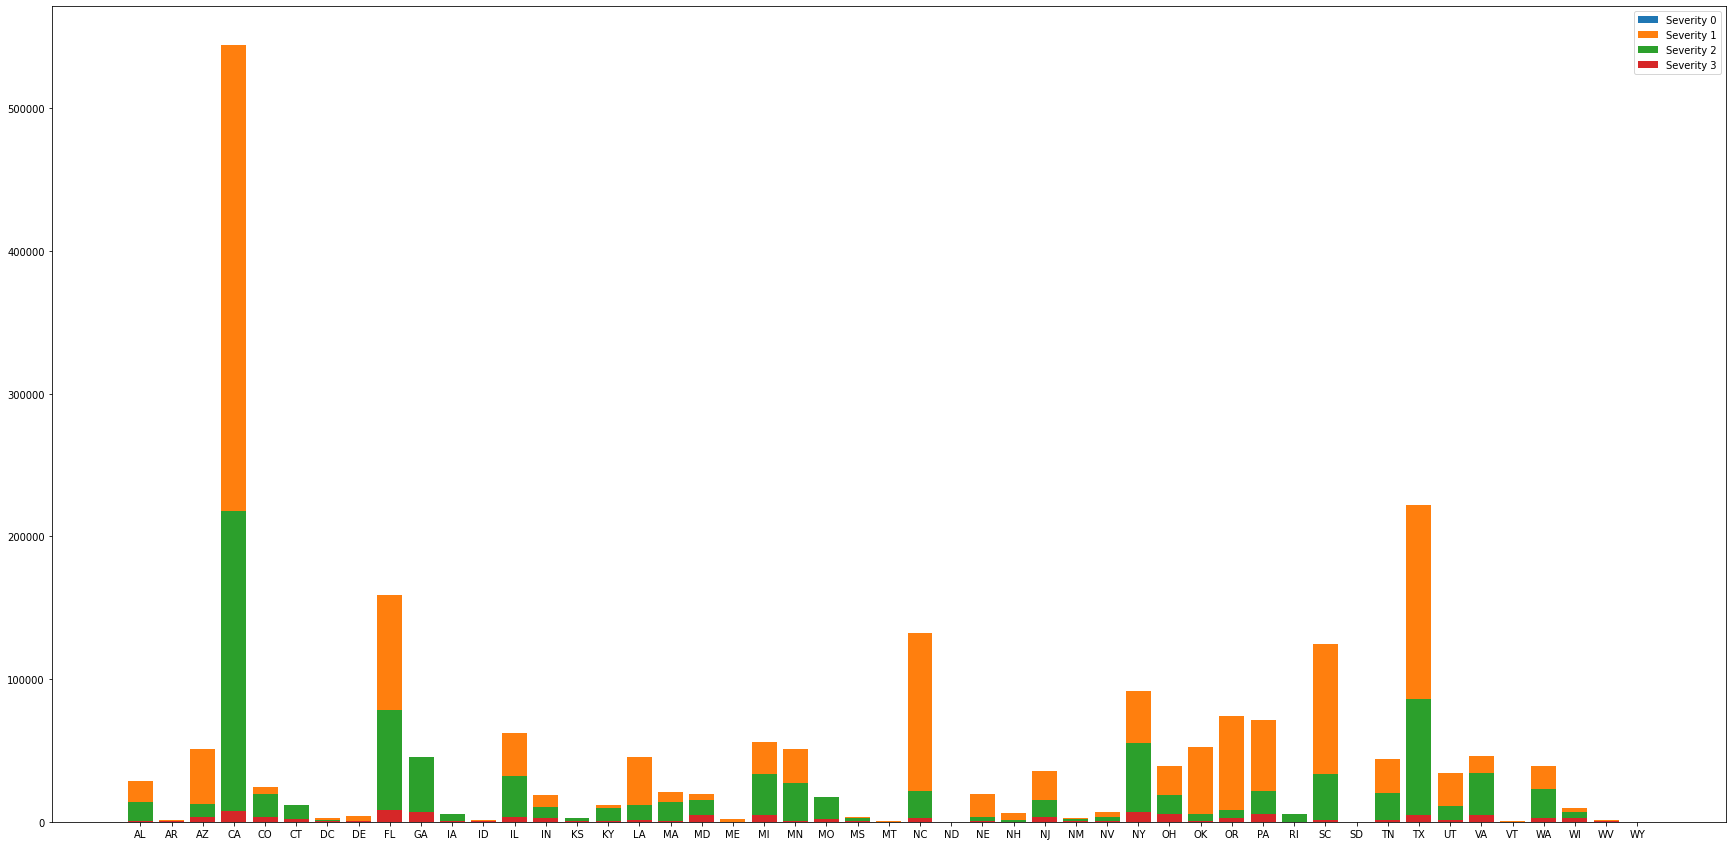

In [22]:
stacked_bar_plot(data, X="State", Y="Severity")

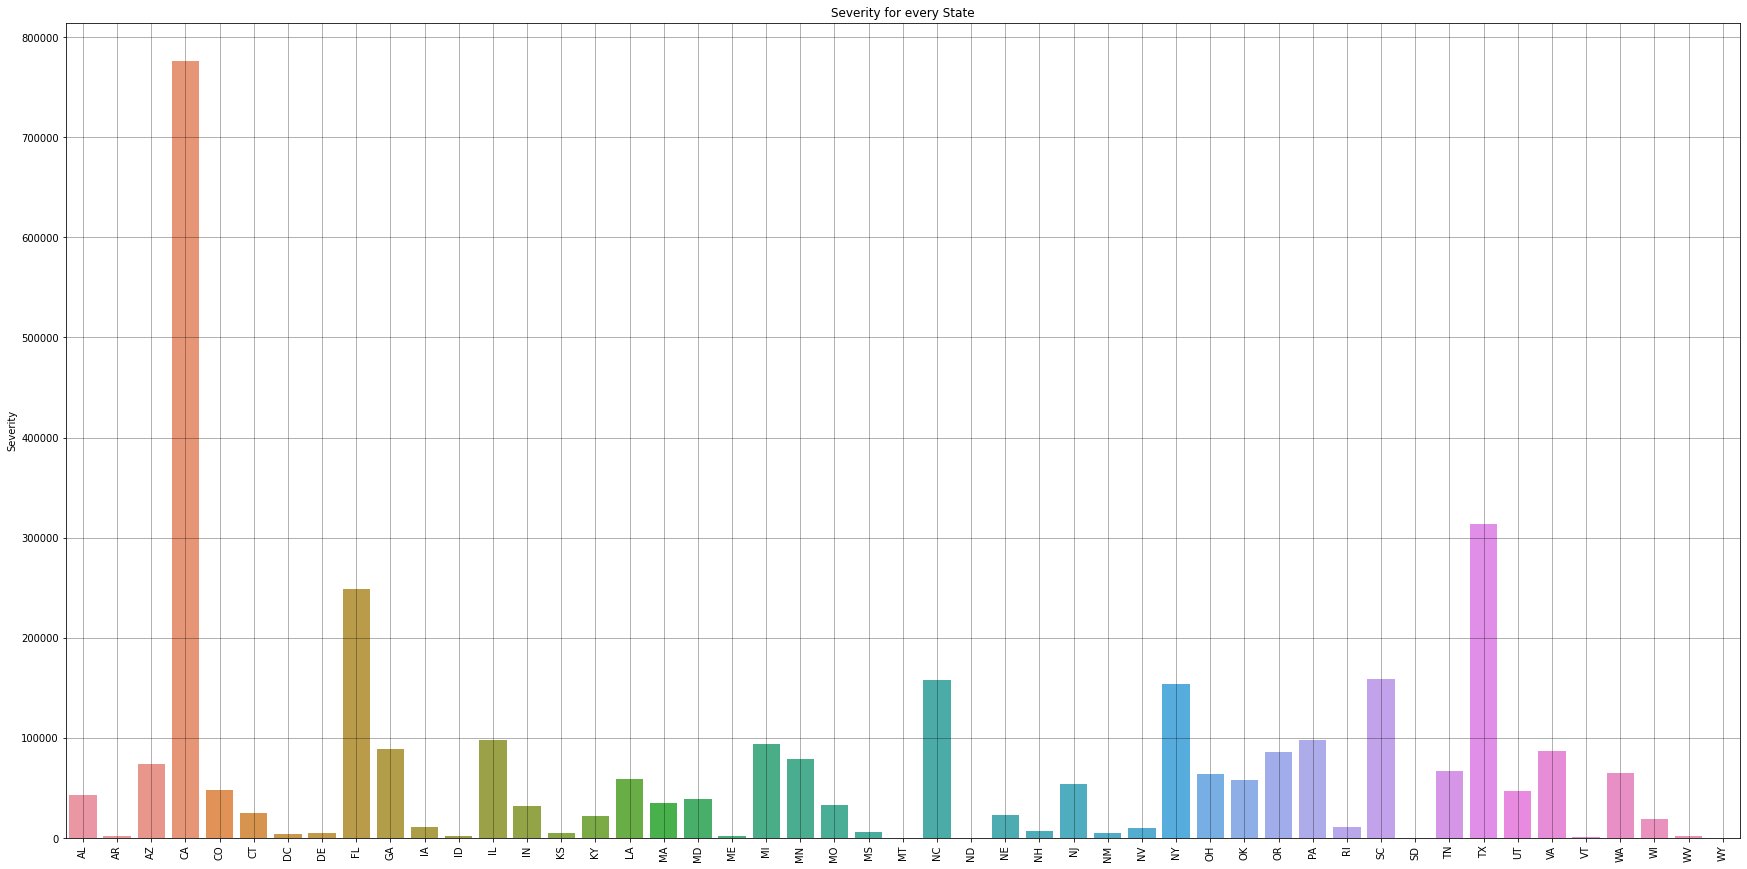

In [23]:
bar_plot(data, X="State", Y="Severity")

# Hour wise Count + Severity Count

In [24]:
data['hour'] = pd.to_datetime(data['Start_Time']).dt.hour

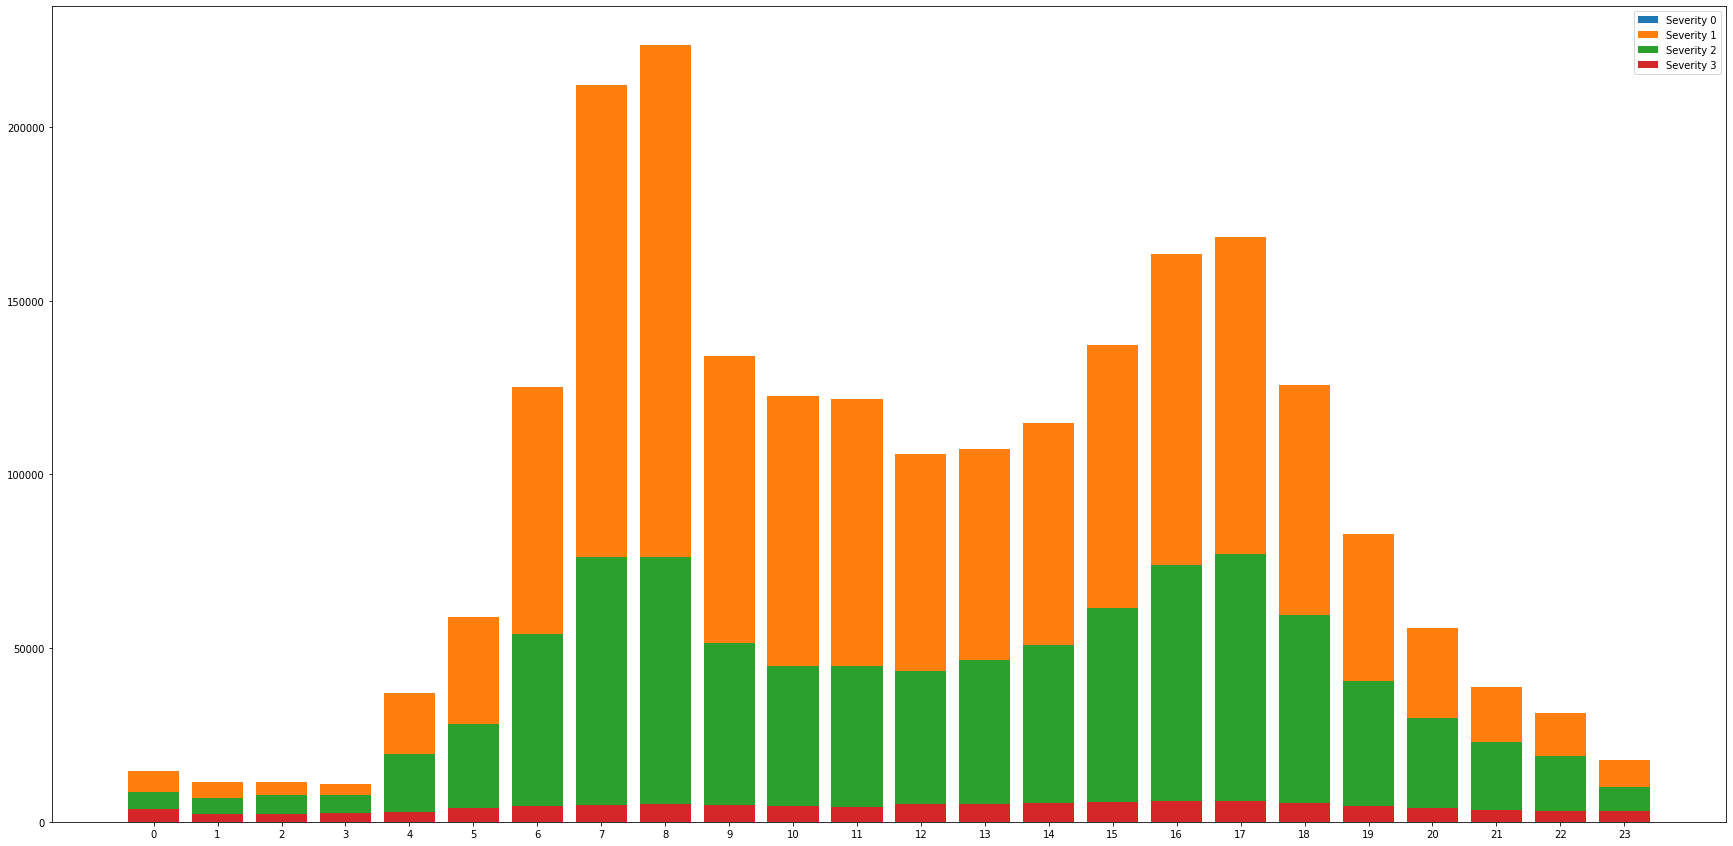

In [25]:
# severity count
stacked_bar_plot(data, X="hour", Y="Severity")

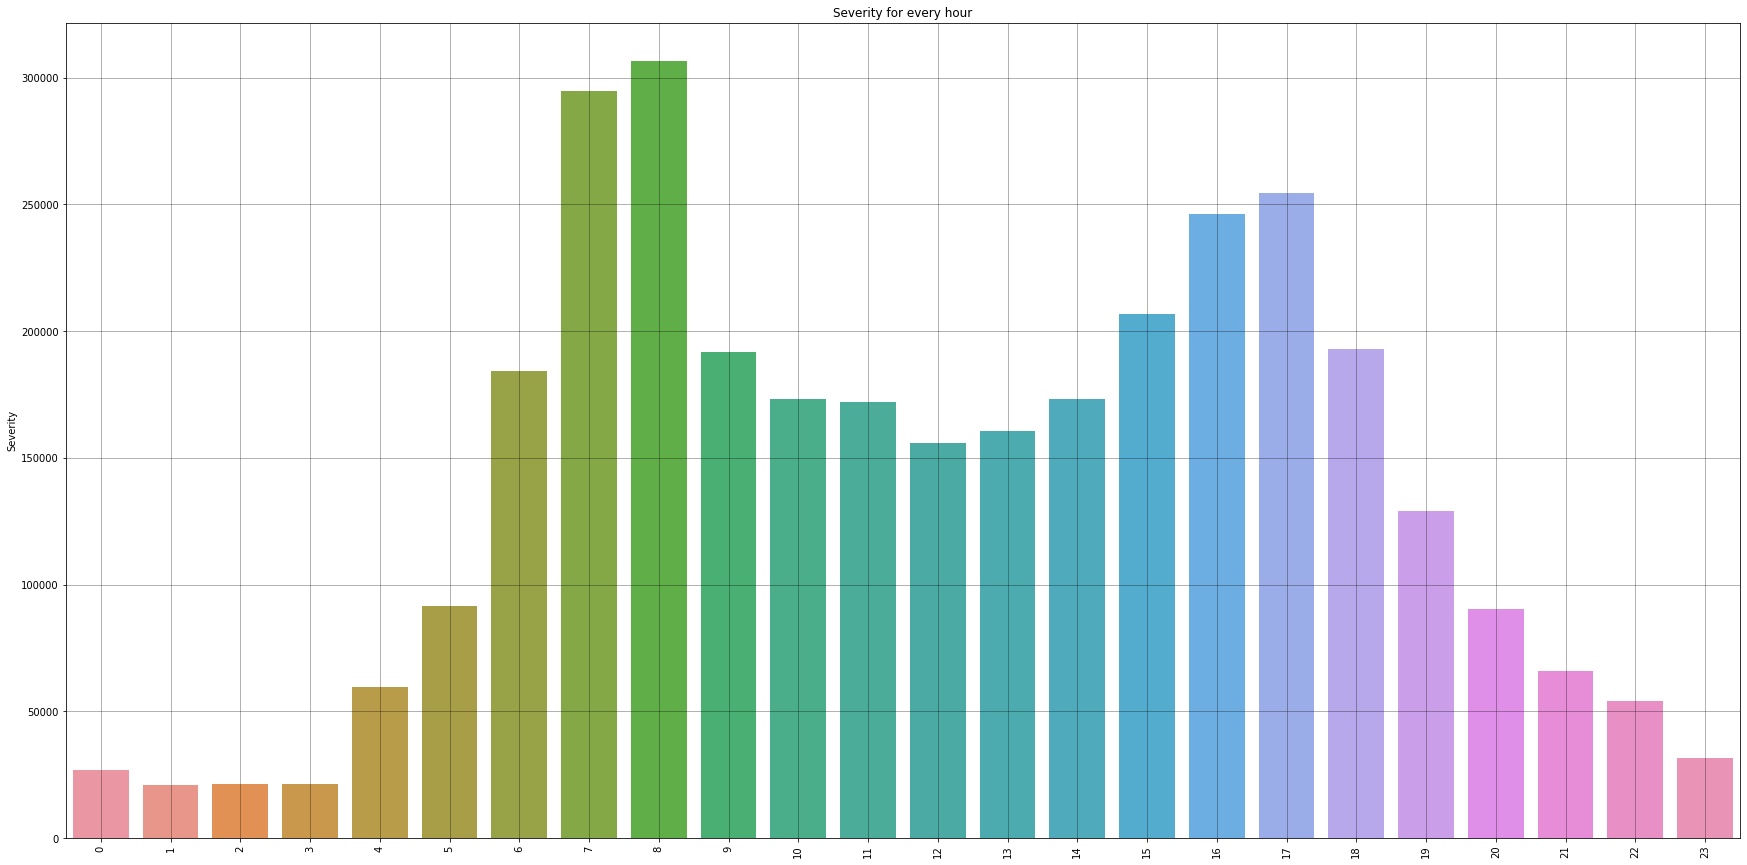

In [26]:
bar_plot(data, "hour", "Severity")

# Severity wise Mean Temperature

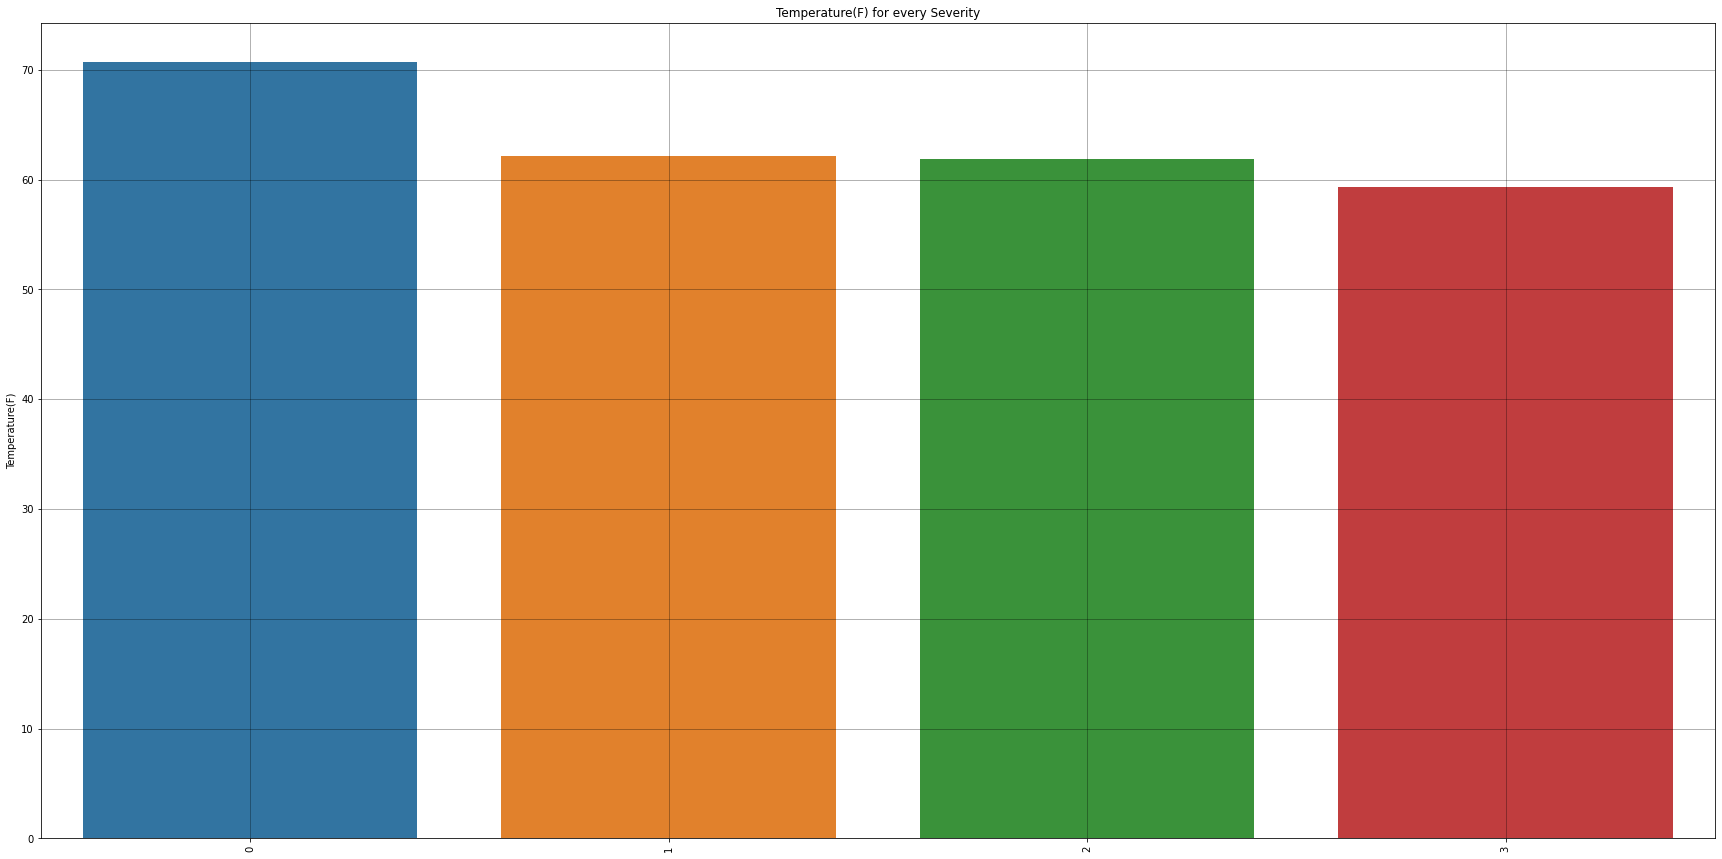

In [27]:
bar_plot(data, "Severity", "Temperature(F)", "mean")

# Extracting x, y and z Features from Start Latitude and Longitude

In [28]:
data['loc_x'] = np.cos(data['Start_Lat']) * np.cos(data['Start_Lng'])
data['loc_y'] = np.cos(data['Start_Lat']) * np.sin(data['Start_Lng'])
data['loc_z'] = np.sin(data['Start_Lat'])

data.drop(columns=["Start_Lat", "Start_Lng"], inplace=True)

# Cyclic Feature Engineering

In [29]:
# duration feature using start and end time
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')
data['End_Time'] = pd.to_datetime(data['End_Time'], errors='coerce')

# Extract year, month, day, hour, weekday and Duration
data['Year'] = data['Start_Time'].dt.year
data['Month'] = data['Start_Time'].dt.month

data['Day'] = data['Start_Time'].dt.day
data['Hour'] = data['Start_Time'].dt.hour

data['Weekday'] = data['Start_Time'].dt.dayofweek
data['Duration'] = round((data['End_Time'] - data['Start_Time']) / np.timedelta64(1, 'm'))

# encoding cyclic features
def cyclic_encoding(data, col, max_val):    
    data[col + '_sin'] = np.sin(2 * np.pi * data[col] / max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col] / max_val)
    return data.drop(col, axis=1)

# encode cyclic features
columns = [("Hour", 24), ("Month", 12), ("Day", 31), ("Weekday", 7)]

for column, period in columns:
    data = cyclic_encoding(data, column, period)
    
data

,ID,Source,Severity,Start_Time,End_Time,Distance(mi),Description,Street,Side,City,...,Year,Duration,Hour_sin,Hour_cos,Month_sin,Month_cos,Day_sin,Day_cos,Weekday_sin,Weekday_cos
0,A-1,MapQuest,2,2016-02-08 05:46:00,2016-02-08 11:00:00,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,R,Dayton,...,2016,314.0,0.965926,2.588190e-01,0.866025,0.5,0.998717,-0.050649,0.000000,1.000000
2,A-3,MapQuest,1,2016-02-08 06:49:27,2016-02-08 07:19:27,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,Williamsburg,...,2016,30.0,1.000000,6.123234e-17,0.866025,0.5,0.998717,-0.050649,0.000000,1.000000
3,A-4,MapQuest,2,2016-02-08 07:23:34,2016-02-08 07:53:34,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,Dayton,...,2016,30.0,0.965926,-2.588190e-01,0.866025,0.5,0.998717,-0.050649,0.000000,1.000000
4,A-5,MapQuest,1,2016-02-08 07:39:07,2016-02-08 08:09:07,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,Dayton,...,2016,30.0,0.965926,-2.588190e-01,0.866025,0.5,0.998717,-0.050649,0.000000,1.000000
5,A-6,MapQuest,2,2016-02-08 07:44:26,2016-02-08 08:14:26,0.010,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,R,Westerville,...,2016,30.0,0.965926,-2.588190e-01,0.866025,0.5,0.998717,-0.050649,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,1,2019-08-23 18:03:25,2019-08-23 18:32:01,0.543,At Market St - Accident.,Pomona Fwy E,R,Riverside,...,2019,29.0,-1.000000,-1.836970e-16,-0.866025,-0.5,-0.998717,-0.050649,-0.433884,-0.900969
3513613,A-3513777,Bing,1,2019-08-23 19:11:30,2019-08-23 19:38:23,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,R,San Diego,...,2019,27.0,-0.965926,2.588190e-01,-0.866025,-0.5,-0.998717,-0.050649,-0.433884,-0.900969
3513614,A-3513778,Bing,1,2019-08-23 19:00:21,2019-08-23 19:28:49,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,R,Orange,...,2019,28.0,-0.965926,2.588190e-01,-0.866025,-0.5,-0.998717,-0.050649,-0.433884,-0.900969
3513615,A-3513779,Bing,1,2019-08-23 19:00:21,2019-08-23 19:29:42,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,R,Culver City,...,2019,29.0,-0.965926,2.588190e-01,-0.866025,-0.5,-0.998717,-0.050649,-0.433884,-0.900969


# Train Test Split

In [30]:
# Train-Test Split
split_ratio = 0.7
msk = np.random.rand(len(data)) < split_ratio

train = data[msk]
test = data[~msk]

print(len(train), len(test))

2659115 665984


# Response Encoding

In [31]:
# Response Encoding
def response_encoding(data, column, label="Severity"):
    value_counts = data.groupby(column)[label].value_counts().reset_index(name="count")

    x = data[[column]].drop_duplicates()
    y = data[[label]].drop_duplicates()

    x["temp"] = 0
    y["temp"] = 0

    temp = pd.merge(x, y, on=["temp"])
    temp.drop(columns=["temp"], inplace=True)
    temp.sort_values(by=[column, label], ascending=True, inplace=True)

    value_counts = temp.merge(value_counts, how="left")
    value_counts.fillna(0, inplace=True)

    numerator = value_counts.groupby(column, sort=False)["count"].apply(np.array)
    denominator = value_counts.groupby(column, sort=False)["count"].sum()
    
    value_counts = (numerator / denominator).apply(lambda x: x.tolist())
    return value_counts.to_dict()


# categorical columns
categorical_columns = ["Street", "Side", "City", "County", "State", "Zipcode", "Timezone", "Airport_Code", 
                       "Wind_Direction", "Weather_Condition", "Year", "Sunrise_Sunset", "Civil_Twilight", 
                       "Astronomical_Twilight", "Nautical_Twilight"]

categorical_encoding = {column: response_encoding(train, column) for column in categorical_columns}

# Feature Aggregation

In [32]:
# aggregate features for all categorical columns
def aggregate_categorical_features(data):
    func = lambda column: data[column].map(lambda x: categorical_encoding[column].get(x, [1/4] * 4))

    categorical_features = func(categorical_columns[0])

    for cat_col in categorical_columns[1:]:
        categorical_features += func(cat_col)

    return categorical_features

train_categorical_features = aggregate_categorical_features(train).reset_index(drop=True)
test_categorical_features = aggregate_categorical_features(test).reset_index(drop=True)

test_categorical_features

5          [0.0, 0.5294117647058824, 0.47058823529411764,...
18         [0.0, 1.0, 0.0, 0.0, 0.010618848672752096, 0.8...
24         [0.0, 0.9866666666666667, 0.0, 0.0133333333333...
26         [0.0, 1.0, 0.0, 0.0, 0.008192389607800386, 0.6...
34         [0.0, 0.8205128205128205, 0.1623931623931624, ...
                                 ...                        
3513596    [0.0028537940172246854, 0.38842174998725987, 0...
3513606    [0.0, 0.9050535987748851, 0.08728943338437979,...
3513608    [0.0002941176470588235, 0.9308823529411765, 0....
3513609    [0.003770739064856712, 0.9668174962292609, 0.0...
3513615    [0.0, 0.3715353472438493, 0.6182912903560677, ...
Name: Street, Length: 665984, dtype: object

In [33]:
boolean_columns = list(data.select_dtypes(include='bool').columns)
coordinate_columns = ["loc_x", "loc_y", "loc_z"]
cyclic_columns = ['Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 'Weekday_sin', 'Weekday_cos']
numerical_columns = ['Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',  'Wind_Speed(mph)', 'Duration']

feature_columns = coordinate_columns + numerical_columns + boolean_columns + cyclic_columns

In [34]:
from sklearn.model_selection import train_test_split

y_train = train["Severity"]
X_train = pd.Series(train[feature_columns].values.tolist()) + train_categorical_features

y_test = test["Severity"]
X_test = pd.Series(test[feature_columns].values.tolist()) + test_categorical_features

In [35]:
X_train = np.array(X_train.tolist())
X_test = np.array(X_test.tolist())

In [36]:
X_train, y_train

(array([[ 0.4047638 ,  0.38801814,  0.82801461, ...,  0.60766837,
          0.32899134,  0.0575622 ],
        [-0.1444351 , -0.1458854 ,  0.97870116, ...,  0.68381315,
          0.28139056,  0.02564229],
        [ 0.37496364,  0.26623194,  0.88798807, ...,  0.68381315,
          0.28139056,  0.02564229],
        ...,
        [-0.13394484,  0.17199417,  0.97594917, ...,  0.68381315,
          0.28139056,  0.02564229],
        [-0.0269993 , -0.70894287,  0.70474893, ...,  0.68381315,
          0.28139056,  0.02564229],
        [ 0.49867736, -0.7631324 ,  0.41103507, ...,  0.68381315,
          0.28139056,  0.02564229]]),
 0          2
 2          1
 3          2
 4          1
 6          1
           ..
 3513611    1
 3513612    1
 3513613    1
 3513614    1
 3513616    1
 Name: Severity, Length: 2659115, dtype: int64)

In [37]:
X_test, y_test

(array([[-0.23718176,  0.69926147,  0.67437246, ...,  0.68381315,
          0.28139056,  0.02564229],
        [ 0.3641089 ,  0.27045415,  0.89122346, ...,  0.68381315,
          0.28139056,  0.02564229],
        [ 0.39888745,  0.25219091,  0.88163969, ...,  0.68381315,
          0.28139056,  0.02564229],
        ...,
        [ 0.54621912, -0.60809609,  0.57607623, ...,  0.68381315,
          0.28139056,  0.02564229],
        [-0.94526586, -0.14530118,  0.29216439, ...,  0.68381315,
          0.28139056,  0.02564229],
        [-0.47218869, -0.7002244 ,  0.53546581, ...,  0.68381315,
          0.28139056,  0.02564229]]),
 5          2
 18         1
 24         1
 26         1
 34         1
           ..
 3513596    1
 3513606    1
 3513608    1
 3513609    1
 3513615    1
 Name: Severity, Length: 665984, dtype: int64)

# Sampling for class imbalance (SMOTE)

In [38]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

In [39]:
# summarize class distribution
counter = Counter(y_train)
counter

Counter({2: 768491, 1: 1785959, 0: 22906, 3: 81759})

In [40]:
under = RandomUnderSampler(sampling_strategy={2: 500000, 1: 1000000})
over = SMOTE(sampling_strategy={0: 50000, 3:100000})

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_train, y_train = pipeline.fit_resample(X_train, y_train)
counter = Counter(y_train)
counter

Counter({0: 50000, 1: 1000000, 2: 500000, 3: 100000})

# XGBoost

In [150]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn import metrics
from sklearn.metrics import f1_score

In [43]:
"""
from sklearn.model_selection import RandomizedSearchCV


x_cfl = XGBClassifier(objective='multi:softmax', num_class=4, n_jobs=-1)

prams={
'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
'n_estimators': [100, 200, 500, 1000, 2000],
'max_depth': [3, 5, 10],
'colsample_bytree': [0.1, 0.3, 0.5, 1],
'subsample': [0.1, 0.3, 0.5, 1],
}

random_cfl = RandomizedSearchCV(x_cfl,param_distributions=prams)
random_cfl.fit(X_train, y_train)

random_cfl.best_params_
"""

In [129]:
# Training with best parameters
x_cfl = XGBClassifier(objective='multi:softmax',
                      num_class=4,
                      n_fold=4,
                      colsample_bytree=1,
                      learning_rate=0.15,
                      max_depth=20,
                      n_estimators=1000,
                      subsample=0.3,
                      tree_method="gpu_hist")

x_cfl.fit(X_train, y_train)

[12:12:24] WARNING: ../src/learner.cc:767: 
Parameters: { "n_fold" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_fold=4, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)


Model Report
Accuracy : 0.9419


Text(0, 0.5, 'Feature Importance Score')

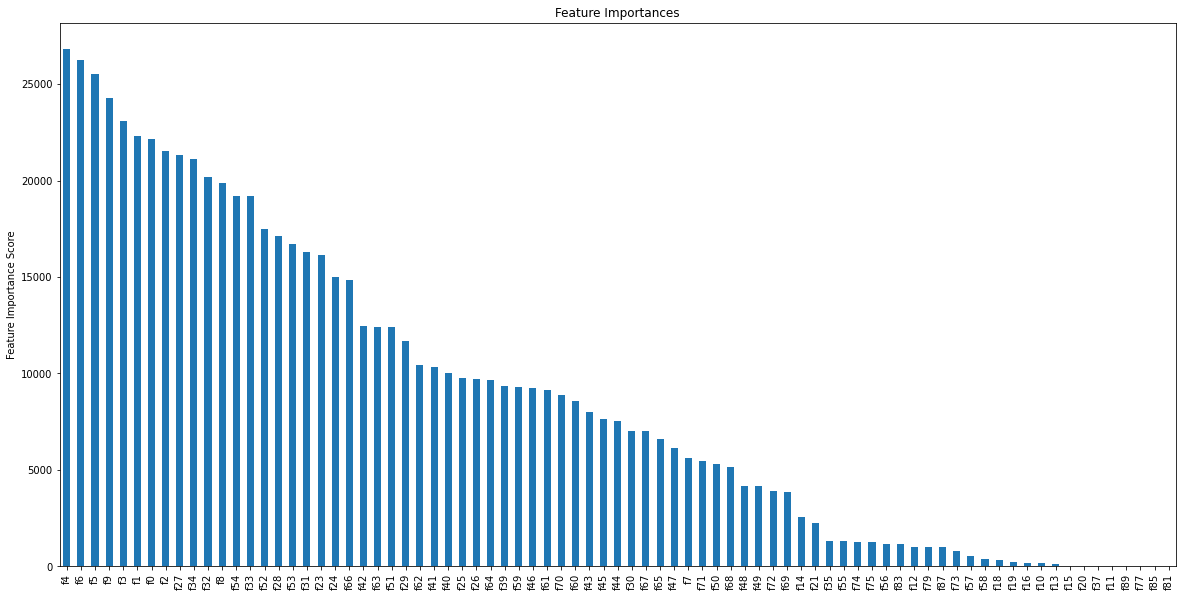

In [130]:
# Predict training set:
dtrain_predictions = x_cfl.predict(X_train)
    
#Print model report:
print("\nModel Report")
print("Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions))

plt.figure(figsize=(20, 10))

feat_imp = pd.Series(x_cfl.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.8575


Text(0, 0.5, 'Feature Importance Score')

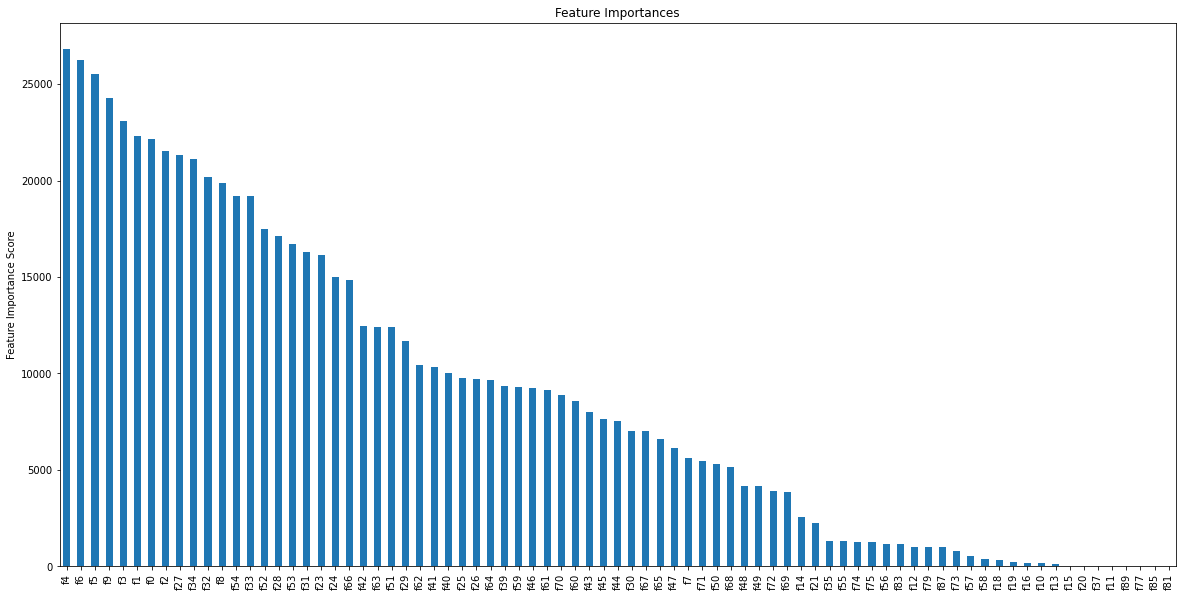

In [131]:
#Predict testing set:
dtest_predictions = x_cfl.predict(X_test)
    
#Print model report:
print("\nModel Report")
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, dtest_predictions))

plt.figure(figsize=(20, 10)) 

feat_imp = pd.Series(x_cfl.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [132]:
print ("The train f1 score is:", f1_score(y_train, dtrain_predictions, average='weighted'))
print("The test f1 score is:", f1_score(y_test, dtest_predictions, average='weighted'))

The train f1 score is: 0.9419509249141585
The test f1 score is: 0.859173574881648


# Random Forest Classifier

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
# training the model with same params as above XGBoost model as hyperparmater tuning is taking too long due to lack of computing power
rf = RandomForestClassifier(n_jobs=-1,
                            bootstrap=True,
                            max_features='auto',
                            n_estimators=1000,
                            max_depth=20,
                            class_weight='balanced')

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       max_features='auto', n_estimators=1000, n_jobs=-1)

In [151]:
def model_stats(model):
    # Training Accuracy
    dtrain_predictions = model.predict(X_train)

    print("\nModel Report")
    print("Train Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions))

    # Testing Accuracy
    dtest_predictions = model.predict(X_test)

    print("\nModel Report")
    print("Test Accuracy : %.4g" % metrics.accuracy_score(y_test, dtest_predictions))

    # F1 Score
    print("\n")
    print ("The train f1 score is:", f1_score(y_train, dtrain_predictions, average='weighted'))
    print("The test f1 score is:", f1_score(y_test, dtest_predictions, average='weighted'))

In [153]:
model_stats(rf)


Model Report
Train Accuracy : 0.9034

Model Report
Test Accuracy : 0.8404


The train f1 score is: 0.9052557129461568
The test f1 score is: 0.8496101012824462


# Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
lreg = LogisticRegression(C=100)
lreg.fit(X_train,y_train)

LogisticRegression(C=100)

In [156]:
model_stats(lreg)


Model Report
Train Accuracy : 0.7314

Model Report
Test Accuracy : 0.7691


The train f1 score is: 0.698023508229239
The test f1 score is: 0.7532374497266354


# LightGBM

In [157]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [158]:
lgbm = LGBMClassifier(learning_rate=0.1,
                      boosting_type='gbdt',
                      objective='multiclass',
                      metric='multi_logloss',
                      num_class=4,
                      sub_feature=0.5,
                      num_leaves=10,
                      min_data=2000,
                      max_depth=10)

lgbm.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=2000. Current value: min_data_in_leaf=2000


LGBMClassifier(max_depth=10, metric='multi_logloss', min_data=2000, num_class=4,
               num_leaves=10, objective='multiclass', sub_feature=0.5)

In [159]:
model_stats(lgbm)


Model Report
Train Accuracy : 0.8656

Model Report
Test Accuracy : 0.8365


The train f1 score is: 0.8647717572393713
The test f1 score is: 0.8382688960027688


# MLP

In [ ]:
import os
import math
import warnings
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset

warnings.filterwarnings("ignore")
torch.manual_seed(0)

os.environ["CUDA_VISIBLE_DEVICES"] = "3"  
torch.cuda.device_count()

In [257]:
class CDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        features = self.x[idx]
        target = self.y[idx]

        return torch.tensor(features), torch.LongTensor([target])
        
    
from torch.utils.data import DataLoader, random_split


BATCH_SIZE = 64
cdata_train = CDataset(X_train, np.array(y_train))
cdata_test = CDataset(X_test, np.array(y_test))

# train dataloader
train_dataloader_args =  dict(shuffle=True, batch_size=BATCH_SIZE, num_workers=0)
trainloader = DataLoader(cdata_train, pin_memory=True, **train_dataloader_args)

# test dataloader
test_dataloader_args =  dict(shuffle=False, batch_size=5000, num_workers=0)
testloader = DataLoader(cdata_test, pin_memory=True, **test_dataloader_args)

In [258]:
cdata_test[0]

(tensor([-2.3718e-01,  6.9926e-01,  6.7437e-01,  1.0000e-02,  3.7900e+01,
          9.7000e+01,  2.9630e+01,  7.0000e+00,  3.5000e+00,  3.0000e+01,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  9.6593e-01, -2.5882e-01,
          8.6603e-01,  5.0000e-01,  9.9872e-01, -5.0649e-02,  0.0000e+00,
          1.0000e+00,  0.0000e+00,  5.2941e-01,  4.7059e-01,  0.0000e+00,
          8.1924e-03,  6.2667e-01,  3.3582e-01,  2.9320e-02,  0.0000e+00,
          7.2546e-01,  2.4792e-01,  2.6622e-02,  1.5803e-03,  5.0814e-01,
          4.1806e-01,  7.2219e-02,  8.2986e-03,  6.1823e-01,  2.9268e-01,
          8.0794e-02,  0.0000e+00,  5.7330e-01,  3.8743e-01,  3.9267e-02,
          6.6703e-03,  6.4184e-01,  3.0769e-01,  4.3799e-02,  1.8092e-03,
          5.1497e-01,  4.2911e-01,  5.4112e-02,  1.0480e-02,  6.7155e-01,
          2.8587e-01,  3.2107e-02,  8.

In [259]:
len(cdata_train[0][0])

91

In [283]:
class FeedForwardNet(nn.Module):
    def __init__(self, ndimension, ntarget, dropout=0.1):
        super().__init__()
        layer1 = self._get_layer(ndimension, 64, dropout)
        layer2 = self._get_layer(64, 32, dropout)
        layer3 = nn.Linear(32, ntarget, bias=False)
        
        self.layer = nn.Sequential(*[layer1, layer2, layer3])
        
    def _get_layer(self, in_dim, out_dim, dropout=0.1):
        return nn.Sequential(
            nn.Linear(in_dim, out_dim, bias=False),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

    def forward(self, input_vec):
        return self.layer(input_vec)

In [284]:
device = "cuda"
model = FeedForwardNet(ndimension=91, ntarget=4, dropout=0.2).to(device)

In [285]:
from torch import optim

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [286]:
def train(epoch, model, device, trainloader, optimizer):
    model.train()

    running_loss = 0
    running_accuracy = 0
    
    iterator = 0
    correct = 0
    processed = 0
    pbar = tqdm(trainloader)

    for i, (src, trg) in enumerate(pbar, 0):
        src, trg = src.to(device), trg.squeeze(-1).to(device)

        output = model(src.float())

        loss = criterion(output, trg)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        pred = output.argmax(-1)
        correct += pred.eq(trg.view_as(pred)).sum().item()
        processed += len(pred)
        
        running_loss += loss.item()
        
    print("Train Epoch - {epoch}, Mini Batch - {batch}, Train Loss - {loss}, Train Accuracy - {accuracy}".format(
                epoch=epoch + 1,
                batch=i + 1,
                loss=round(running_loss / (i+1), 4),
                accuracy=round(100 * correct / processed, 4)
            )
         )

In [287]:
def test(model, device, testloader):
    model.eval()

    iterator = 0
    test_loss = 0
    correct = 0
    processed = 0
    pbar = tqdm(testloader, disable=True)

    with torch.no_grad():
        for i, (src, trg) in enumerate(pbar, 0):
            src, trg = src.to(device), trg.squeeze(-1).to(device)

            output = model(src.float())

            loss = criterion(output, trg)
            test_loss += loss.item()
            
            pred = output.argmax(-1)
            correct += pred.eq(trg.view_as(pred)).sum().item()
            processed += len(pred)

        print("Test Loss - {loss}, Test Accuracy - {accuracy}".format(
                    loss=round(test_loss / (i+1), 4),
                    accuracy=round(100 * correct / processed, 4)
             )
        )

In [288]:
EPOCHS = 10

for epoch in range(EPOCHS):
    train(epoch, model, device, trainloader, optimizer)
    test(model, device, testloader)

    torch.save(model.state_dict(), './model.pt')

100%|██████████| 25782/25782 [01:50<00:00, 233.12it/s]


Train Epoch - 1, Mini Batch - 25782, Train Loss - 0.493, Train Accuracy - 81.0308
Test Loss - 0.4911, Test Accuracy - 79.595


100%|██████████| 25782/25782 [01:48<00:00, 237.04it/s]


Train Epoch - 2, Mini Batch - 25782, Train Loss - 0.4426, Train Accuracy - 82.5537
Test Loss - 0.4872, Test Accuracy - 80.0911


100%|██████████| 25782/25782 [01:50<00:00, 233.42it/s]


Train Epoch - 3, Mini Batch - 25782, Train Loss - 0.4365, Train Accuracy - 82.7905
Test Loss - 0.4798, Test Accuracy - 80.4585


100%|██████████| 25782/25782 [01:50<00:00, 234.34it/s]


Train Epoch - 4, Mini Batch - 25782, Train Loss - 0.4285, Train Accuracy - 83.0074
Test Loss - 0.4751, Test Accuracy - 80.9943


100%|██████████| 25782/25782 [01:52<00:00, 228.30it/s]


Train Epoch - 5, Mini Batch - 25782, Train Loss - 0.4223, Train Accuracy - 83.2049
Test Loss - 0.4695, Test Accuracy - 81.0964


100%|██████████| 25782/25782 [01:50<00:00, 233.21it/s]


Train Epoch - 6, Mini Batch - 25782, Train Loss - 0.422, Train Accuracy - 83.2065
Test Loss - 0.456, Test Accuracy - 81.6973


100%|██████████| 25782/25782 [01:52<00:00, 229.43it/s]


Train Epoch - 7, Mini Batch - 25782, Train Loss - 0.4229, Train Accuracy - 83.2021
Test Loss - 0.468, Test Accuracy - 80.9905


100%|██████████| 25782/25782 [01:52<00:00, 228.50it/s]


Train Epoch - 8, Mini Batch - 25782, Train Loss - 0.4218, Train Accuracy - 83.3006
Test Loss - 0.4653, Test Accuracy - 81.1219


100%|██████████| 25782/25782 [01:51<00:00, 230.54it/s]


Train Epoch - 9, Mini Batch - 25782, Train Loss - 0.4179, Train Accuracy - 83.4248
Test Loss - 0.4473, Test Accuracy - 81.7655


100%|██████████| 25782/25782 [01:52<00:00, 229.65it/s]


Train Epoch - 10, Mini Batch - 25782, Train Loss - 0.412, Train Accuracy - 83.5167
Test Loss - 0.4551, Test Accuracy - 82.043


In [289]:
def test(model, device, testloader):
    model.eval()

    pbar = tqdm(testloader)
    
    prediction = []

    with torch.no_grad():
        for i, (src, trg) in enumerate(pbar, 0):
            src, trg = src.to(device), trg.squeeze(-1).to(device)

            output = model(src.float())         
            prediction.extend(output.argmax(-1).tolist())
            
    return np.array(prediction)

In [290]:
dtest_predictions = infer(model, device, testloader)

print("\nModel Report")
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, dtest_predictions))

100%|██████████| 134/134 [00:21<00:00,  6.16it/s]



Model Report
Accuracy : 0.8204


In [291]:
print("The test f1 score is:", f1_score(y_test, dtest_predictions, average='weighted'))

The test f1 score is: 0.8263836727223196


# Conclusion

In [292]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model", "Test Accuracy", "Test F1 Score"]

x.add_row(["Logistic Regression", "76.91 %", "75.32 %"])
x.add_row(["MLP", "82.04 %", "82.63 %"])
x.add_row(["LightGBM", "83.65 %", "83.82 %"])
x.add_row(["Random Forest Classifier", "84.04 %", "84.96 %"])
x.add_row(["XGBoost", "85.75 %", "85.91 %"])

print(x)

+--------------------------+---------------+---------------+
|          Model           | Test Accuracy | Test F1 Score |
+--------------------------+---------------+---------------+
|   Logistic Regression    |    76.91 %    |    75.32 %    |
|           MLP            |    82.04 %    |    82.63 %    |
|         LightGBM         |    83.65 %    |    83.82 %    |
| Random Forest Classifier |    84.04 %    |    84.96 %    |
|         XGBoost          |    85.75 %    |    85.91 %    |
+--------------------------+---------------+---------------+
